In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from pickle import dump, load 
from sklearn.preprocessing import LabelEncoder
import scipy

In [2]:
df = pd.read_csv('imports-85.csv')

In [3]:
# Replace '?' with nan
df = df.replace('?', np.nan)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

# Data understanding

In [5]:
df.describe().transpose().to_csv('basic_stat.csv')

In [6]:
df.head()

symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3               NaN  alfa-romero       gas        std          two   
1          3               NaN  alfa-romero       gas        std          two   
2          1               NaN  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  stroke compression-ratio horsepower  peak-rpm city-mpg  \
0         mpfi  3.47    2.68               9.0        111      5000       21   
1         mpfi  3.47    2.68               9.0        111      5000       21   
2         mpfi  2.68    3.47               9.0        154      5000       19   
3         mpfi  3.19     3.4              10.0        102      5500       24   
4         mpfi  3.19     3.4               8.0        115      5500       18   

  highway-mpg  price  
0          27  13495  
1          27  16500  
2          26  16500  
3          30  13950  
4          22  17450  

[5 rows x 26 columns]

In [7]:
# Convert to numeric
df['bore'] = pd.to_numeric(df['bore'], errors='coerce')
df['stroke'] = pd.to_numeric(df['stroke'], errors='coerce')
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df['peak-rpm'] = pd.to_numeric(df['peak-rpm'], errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['normalized-losses'] = pd.to_numeric(df['normalized-losses'], errors='coerce')

In [8]:
df.describe().transpose()

count          mean          std      min      25%  \
symboling          205.0      0.834146     1.245307    -2.00     0.00   
normalized-losses  164.0    122.000000    35.442168    65.00    94.00   
wheel-base         205.0     98.756585     6.021776    86.60    94.50   
length             205.0    174.049268    12.337289   141.10   166.30   
width              205.0     65.907805     2.145204    60.30    64.10   
height             205.0     53.724878     2.443522    47.80    52.00   
curb-weight        205.0   2555.565854   520.680204  1488.00  2145.00   
engine-size        205.0    126.907317    41.642693    61.00    97.00   
bore               201.0      3.329751     0.273539     2.54     3.15   
stroke             201.0      3.255423     0.316717     2.07     3.11   
compression-ratio  205.0     10.142537     3.972040     7.00     8.60   
horsepower         203.0    104.256158    39.714369    48.00    70.00   
peak-rpm           203.0   5125.369458   479.334560  4150.00  4800.00   
city-mpg           205.0     25.219512     6.542142    13.00    19.00   
highway-mpg        205.0     30.751220     6.886443    16.00    25.00   
price              201.0  13207.129353  7947.066342  5118.00  7775.00   

                        50%       75%       max  
symboling              1.00      2.00      3.00  
normalized-losses    115.00    150.00    256.00  
wheel-base            97.00    102.40    120.90  
length               173.20    183.10    208.10  
width                 65.50     66.90     72.30  
height                54.10     55.50     59.80  
curb-weight         2414.00   2935.00   4066.00  
engine-size          120.00    141.00    326.00  
bore                   3.31      3.59      3.94  
stroke                 3.29      3.41      4.17  
compression-ratio      9.00      9.40     23.00  
horsepower            95.00    116.00    288.00  
peak-rpm            5200.00   5500.00   6600.00  
city-mpg              24.00     30.00     49.00  
highway-mpg           30.00     34.00     54.00  
price              10295.00  16500.00  45400.00

# Data distribution

In [9]:
numbers = [f for f in df.columns if df.dtypes[f] != 'object']
numbers

['symboling',
 'normalized-losses',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-size',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg',
 'price']

In [10]:
def ExploreContVariable(data=df, column='price'):
    slice = data[column]
    plt.figure(figsize = (8,4))
    plt.subplot(1,3,1)
    sns.histplot(slice)
    plt.subplot(1,3,2)
    sns.distplot(slice)
    plt.subplot(1,3,3)
    sns.boxplot(y=slice)
    plt.tight_layout()
    plt.show()

    print('Skew: %.2f' % slice.skew())
    print(slice.describe())
    Q1 = np.percentile(slice.dropna(), 25)
    Q3 = np.percentile(slice.dropna(), 75)
    IQR = scipy.stats.iqr(slice.dropna())
    n_O_upper = data[slice > (Q3 + 1.5*IQR)].shape[0]
    n_O_lower = data[slice < (Q1 - 1.5*IQR)].shape[0]
    print('Upper outlier:', n_O_upper, ',', 'Lower outlier:', n_O_lower)
    
    if (n_O_lower + n_O_upper) != 0:
        df_check = data.copy()
        df_check = df_check[((df_check[column]) <= (Q3 + 1.5 * IQR)) & ((df_check[column]) >= (Q1 - 1.5 * IQR))]
        print('Mean before drop outlier: %.2f' % (slice.mean()))
        print('Mean after drop outlier: %.2f' % (df_check[column].mean()))
        print('Skew after drop outlier: %.2f' % (df_check[column].skew()))

C:\Users\thanh\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


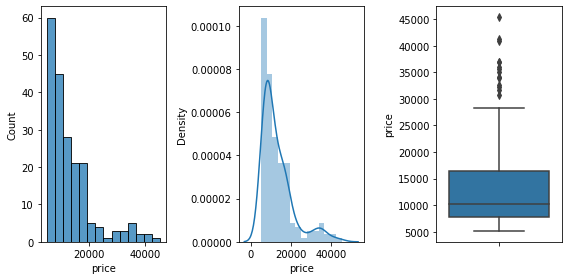

Skew: 1.81
count      201.000000
mean     13207.129353
std       7947.066342
min       5118.000000
25%       7775.000000
50%      10295.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64
Upper outlier: 14 , Lower outlier: 0
Mean before drop outlier: 13207.13
Mean after drop outlier: 11503.18
Skew after drop outlier: 1.02


In [11]:
ExploreContVariable()

C:\Users\thanh\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


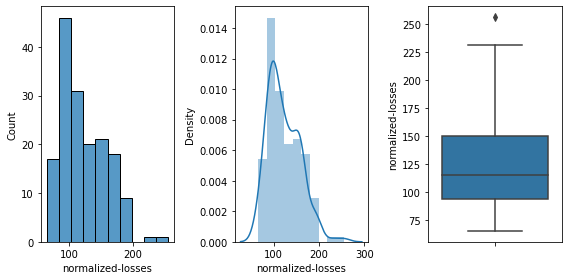

Skew: 0.77
count    164.000000
mean     122.000000
std       35.442168
min       65.000000
25%       94.000000
50%      115.000000
75%      150.000000
max      256.000000
Name: normalized-losses, dtype: float64
Upper outlier: 1 , Lower outlier: 0
Mean before drop outlier: 122.00
Mean after drop outlier: 121.18
Skew after drop outlier: 0.57


In [12]:
ExploreContVariable(column='normalized-losses')

C:\Users\thanh\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


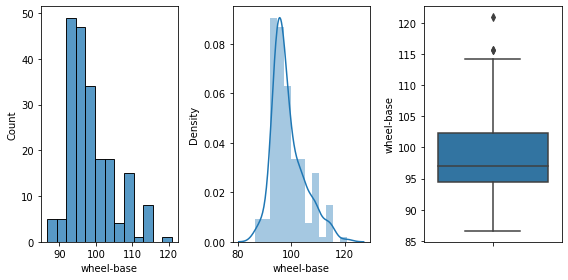

Skew: 1.05
count    205.000000
mean      98.756585
std        6.021776
min       86.600000
25%       94.500000
50%       97.000000
75%      102.400000
max      120.900000
Name: wheel-base, dtype: float64
Upper outlier: 3 , Lower outlier: 0
Mean before drop outlier: 98.76
Mean after drop outlier: 98.48
Skew after drop outlier: 0.89


In [13]:
ExploreContVariable(column='wheel-base')

C:\Users\thanh\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


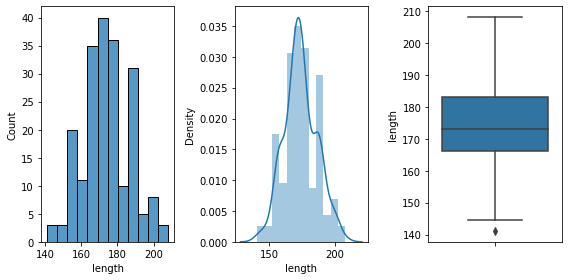

Skew: 0.16
count    205.000000
mean     174.049268
std       12.337289
min      141.100000
25%      166.300000
50%      173.200000
75%      183.100000
max      208.100000
Name: length, dtype: float64
Upper outlier: 0 , Lower outlier: 1
Mean before drop outlier: 174.05
Mean after drop outlier: 174.21
Skew after drop outlier: 0.22


In [14]:
ExploreContVariable(df,'length')

C:\Users\thanh\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


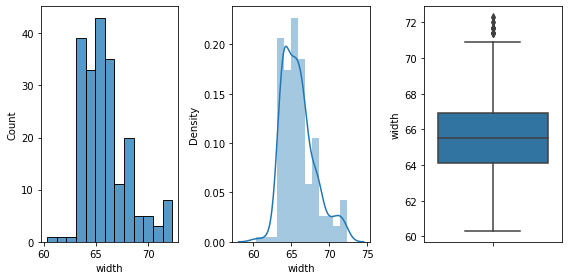

Skew: 0.90
count    205.000000
mean      65.907805
std        2.145204
min       60.300000
25%       64.100000
50%       65.500000
75%       66.900000
max       72.300000
Name: width, dtype: float64
Upper outlier: 8 , Lower outlier: 0
Mean before drop outlier: 65.91
Mean after drop outlier: 65.67
Skew after drop outlier: 0.59


In [15]:
ExploreContVariable(df,'width')

C:\Users\thanh\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


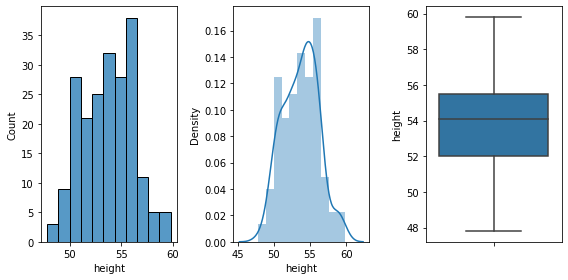

Skew: 0.06
count    205.000000
mean      53.724878
std        2.443522
min       47.800000
25%       52.000000
50%       54.100000
75%       55.500000
max       59.800000
Name: height, dtype: float64
Upper outlier: 0 , Lower outlier: 0


In [16]:
ExploreContVariable(df,'height')

C:\Users\thanh\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


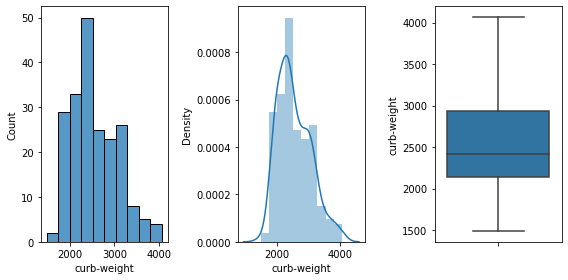

Skew: 0.68
count     205.000000
mean     2555.565854
std       520.680204
min      1488.000000
25%      2145.000000
50%      2414.000000
75%      2935.000000
max      4066.000000
Name: curb-weight, dtype: float64
Upper outlier: 0 , Lower outlier: 0


In [17]:
ExploreContVariable(df,'curb-weight')

C:\Users\thanh\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


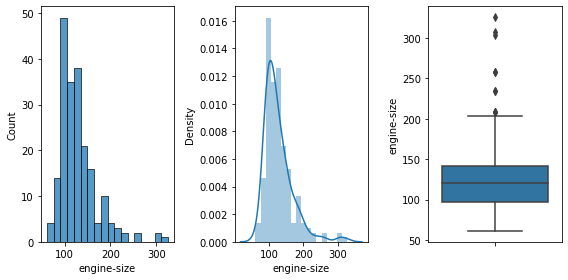

Skew: 1.95
count    205.000000
mean     126.907317
std       41.642693
min       61.000000
25%       97.000000
50%      120.000000
75%      141.000000
max      326.000000
Name: engine-size, dtype: float64
Upper outlier: 10 , Lower outlier: 0
Mean before drop outlier: 126.91
Mean after drop outlier: 120.34
Skew after drop outlier: 0.78


In [18]:
ExploreContVariable(df,'engine-size')

C:\Users\thanh\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


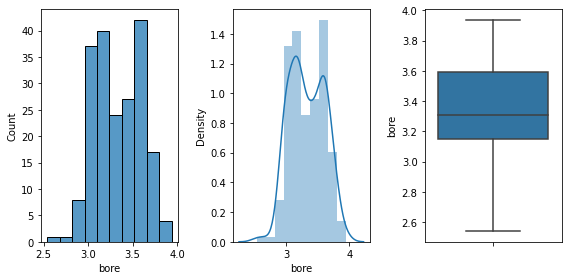

Skew: 0.02
count    201.000000
mean       3.329751
std        0.273539
min        2.540000
25%        3.150000
50%        3.310000
75%        3.590000
max        3.940000
Name: bore, dtype: float64
Upper outlier: 0 , Lower outlier: 0


In [19]:
ExploreContVariable(df,'bore')

C:\Users\thanh\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


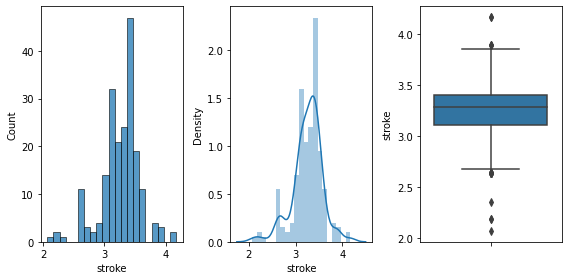

Skew: -0.68
count    201.000000
mean       3.255423
std        0.316717
min        2.070000
25%        3.110000
50%        3.290000
75%        3.410000
max        4.170000
Name: stroke, dtype: float64
Upper outlier: 5 , Lower outlier: 15
Mean before drop outlier: 3.26
Mean after drop outlier: 3.30
Skew after drop outlier: -0.15


In [20]:
ExploreContVariable(df,'stroke')

C:\Users\thanh\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


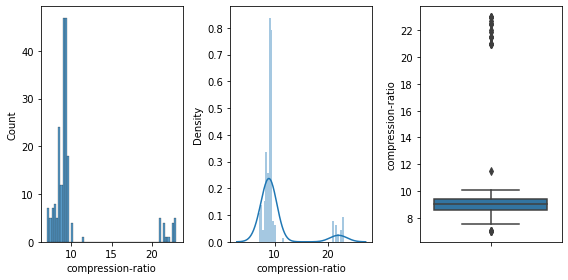

Skew: 2.61
count    205.000000
mean      10.142537
std        3.972040
min        7.000000
25%        8.600000
50%        9.000000
75%        9.400000
max       23.000000
Name: compression-ratio, dtype: float64
Upper outlier: 21 , Lower outlier: 7
Mean before drop outlier: 10.14
Mean after drop outlier: 8.92
Skew after drop outlier: -0.80


In [21]:
ExploreContVariable(df,'compression-ratio')

C:\Users\thanh\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


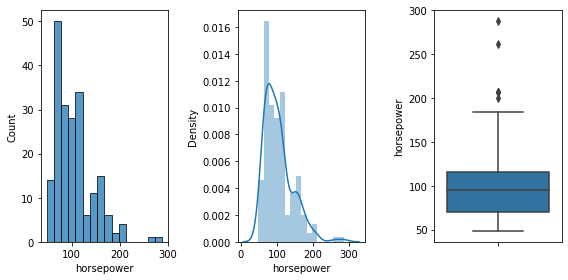

Skew: 1.39
count    203.000000
mean     104.256158
std       39.714369
min       48.000000
25%       70.000000
50%       95.000000
75%      116.000000
max      288.000000
Name: horsepower, dtype: float64
Upper outlier: 6 , Lower outlier: 0
Mean before drop outlier: 104.26
Mean after drop outlier: 100.47
Skew after drop outlier: 0.79


In [22]:
ExploreContVariable(df,'horsepower')

C:\Users\thanh\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


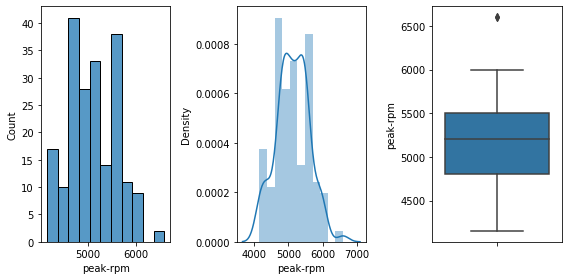

Skew: 0.07
count     203.000000
mean     5125.369458
std       479.334560
min      4150.000000
25%      4800.000000
50%      5200.000000
75%      5500.000000
max      6600.000000
Name: peak-rpm, dtype: float64
Upper outlier: 2 , Lower outlier: 0
Mean before drop outlier: 5125.37
Mean after drop outlier: 5110.70
Skew after drop outlier: -0.15


In [23]:
ExploreContVariable(df,'peak-rpm')

C:\Users\thanh\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


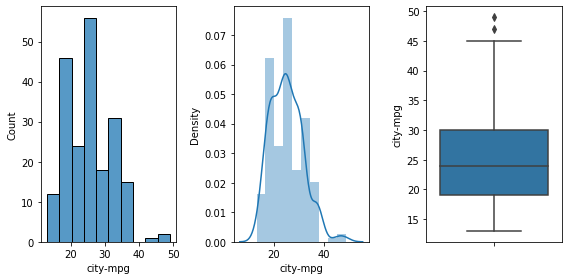

Skew: 0.66
count    205.000000
mean      25.219512
std        6.542142
min       13.000000
25%       19.000000
50%       24.000000
75%       30.000000
max       49.000000
Name: city-mpg, dtype: float64
Upper outlier: 2 , Lower outlier: 0
Mean before drop outlier: 25.22
Mean after drop outlier: 25.00
Skew after drop outlier: 0.40


In [24]:
ExploreContVariable(df,'city-mpg')

C:\Users\thanh\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


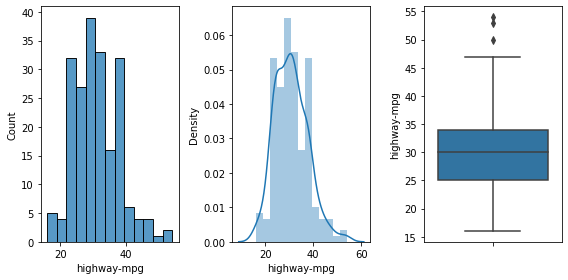

Skew: 0.54
count    205.000000
mean      30.751220
std        6.886443
min       16.000000
25%       25.000000
50%       30.000000
75%       34.000000
max       54.000000
Name: highway-mpg, dtype: float64
Upper outlier: 3 , Lower outlier: 0
Mean before drop outlier: 30.75
Mean after drop outlier: 30.43
Skew after drop outlier: 0.25


In [25]:
ExploreContVariable(df,'highway-mpg')

In [26]:
category = [f for f in df.columns if df.dtypes[f] == 'object']
category

['make',
 'fuel-type',
 'aspiration',
 'num-of-doors',
 'body-style',
 'drive-wheels',
 'engine-location',
 'engine-type',
 'num-of-cylinders',
 'fuel-system']

In [27]:
def ExploreCateVariable(data=df, column='make', figsize=(25,12)):
    plt.figure(figsize = figsize)
    plt.subplot(1,2,1)
    ax = sns.boxplot(data = data, y = 'price', x = column)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=60)
    plt.subplot(1,2,2)
    plt.xticks(rotation=60)
    sns.histplot(data = data, x = column)
    plt.show()

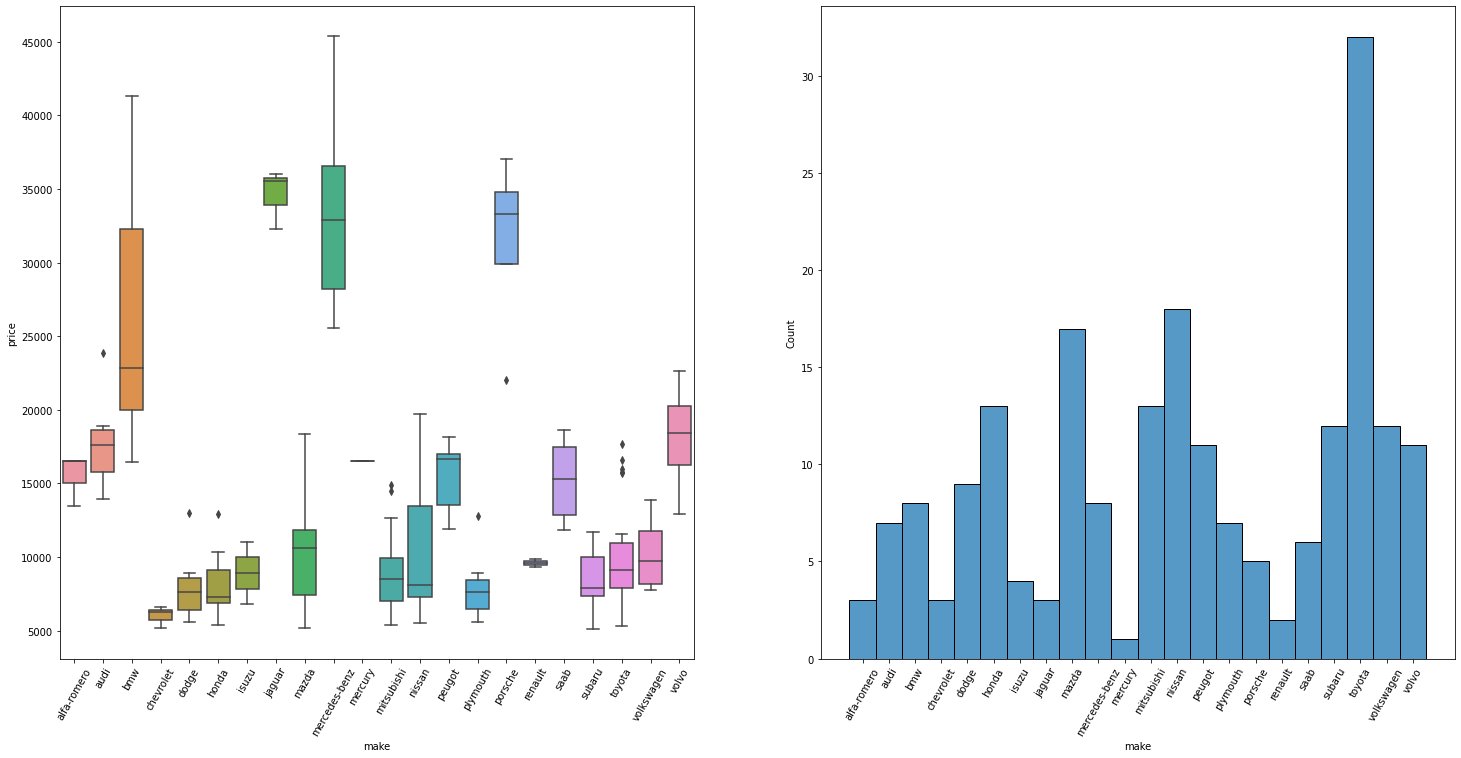

In [28]:
ExploreCateVariable()

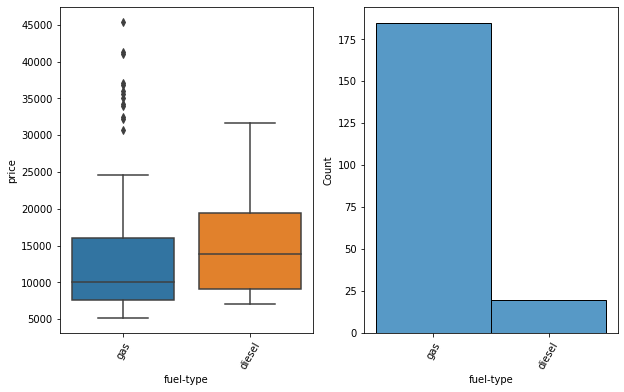

In [29]:
ExploreCateVariable(column='fuel-type', figsize=(10,6))

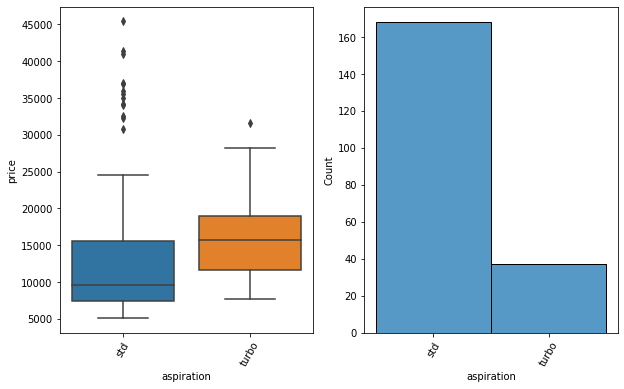

In [30]:
ExploreCateVariable(column='aspiration', figsize=(10,6))

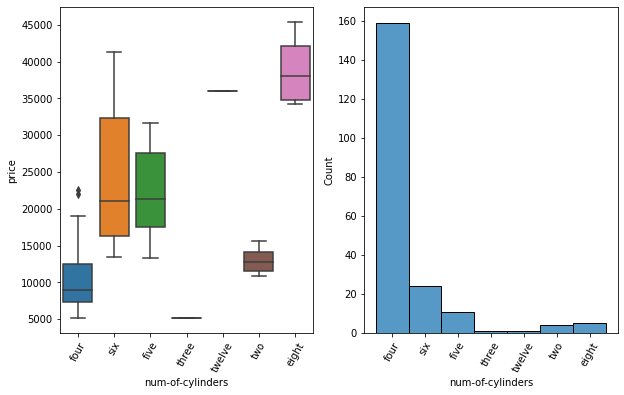

In [31]:
ExploreCateVariable(column='num-of-cylinders', figsize=(10,6))

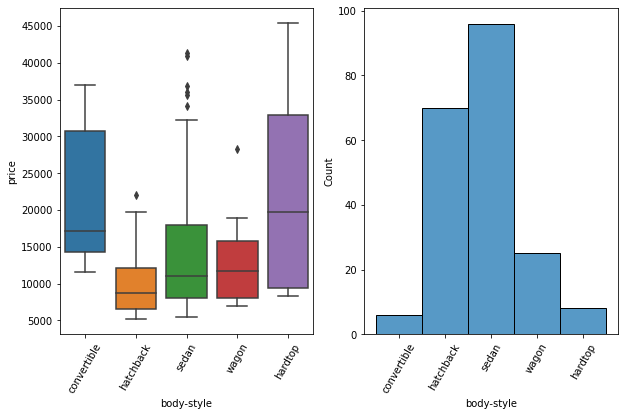

In [32]:
# 'body-style',
#  'drive-wheels',
#  'engine-location',
#  'engine-type',
#  'num-of-cylinders',
#  'fuel-system'
ExploreCateVariable(column='body-style', figsize=(10,6))

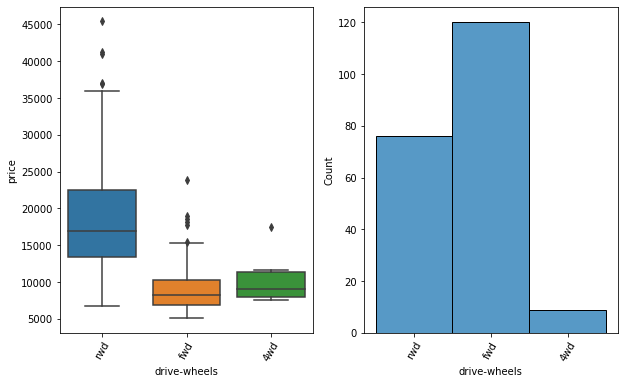

In [33]:
# 'body-style',
#  'drive-wheels',
#  'engine-location',
#  'engine-type',
#  'num-of-cylinders',
#  'fuel-system'
ExploreCateVariable(column='drive-wheels', figsize=(10,6))

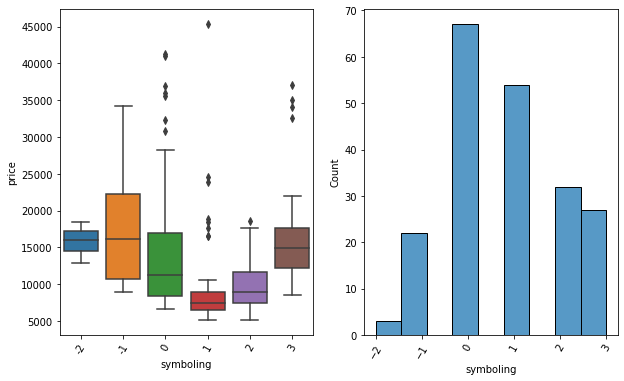

In [34]:
ExploreCateVariable(column='symboling', figsize=(10,6))

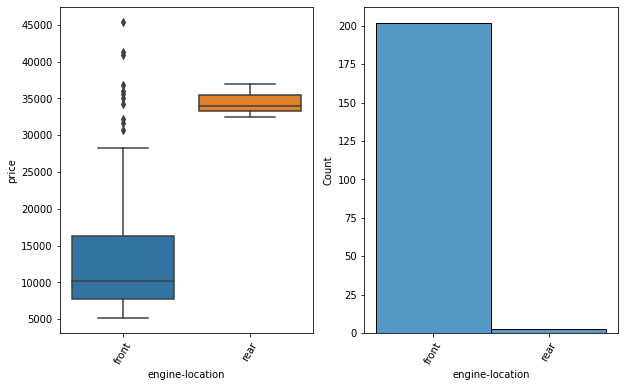

In [35]:
# 'body-style',
#  'drive-wheels',
#  'engine-location',
#  'engine-type',
#  'num-of-cylinders',
#  'fuel-system'
ExploreCateVariable(column='engine-location', figsize=(10,6))

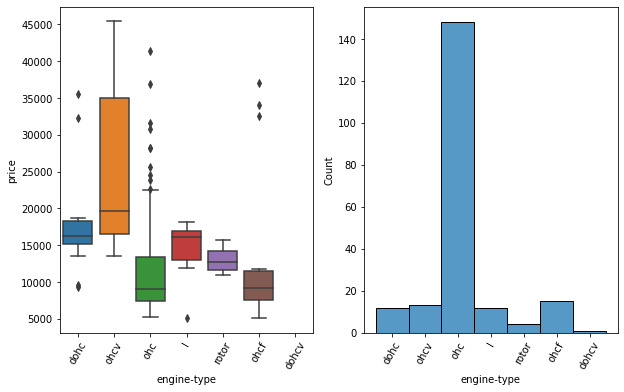

In [36]:
ExploreCateVariable(column='engine-type', figsize=(10,6))

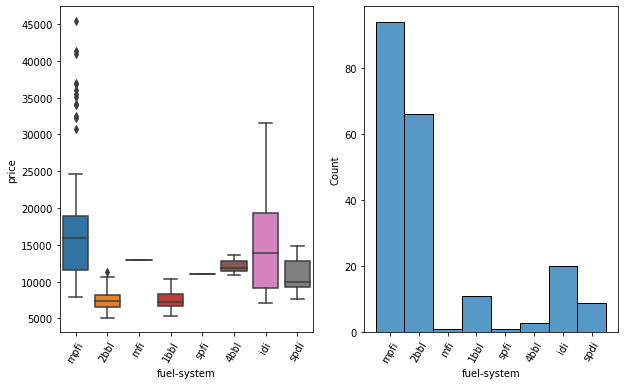

In [37]:
ExploreCateVariable(column='fuel-system', figsize=(10,6))

<AxesSubplot:>

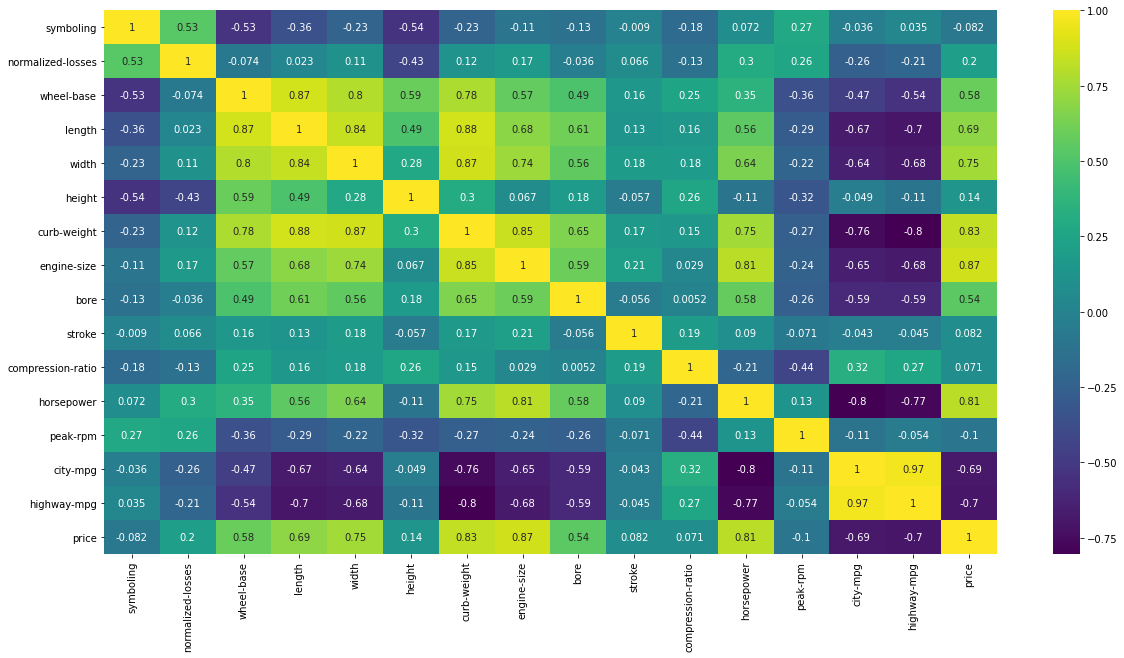

In [38]:
plt.figure(
        figsize=[20,10]
)

sns.heatmap(
        data=df.corr(), 
        cmap='viridis', 
        annot=True, 
        fmt='.2g'
)

In [39]:
# Remove columns have corr low value with price: highway-mpg, city-mpg, peak-rpm, symboling, compression-ratio, stroke

#df.drop(['highway-mpg', 'city-mpg', 'peak-rpm', 'symboling', 'compression-ratio', 'stroke', 'normalized-losses'], axis=1, inplace=True)
#df.drop(['peak-rpm', 'symboling', 'compression-ratio', 'stroke', 'normalized-losses'], axis=1, inplace=True)
df.drop(['peak-rpm', 'compression-ratio', 'stroke', 'normalized-losses'], axis=1, inplace=True)

In [40]:
dummy_variable = pd.get_dummies(df["symboling"])
dummy_variable.head()
# Add column fwd and column not-fwd into data.
df = pd.concat([df, dummy_variable], axis=1)
df.drop(['symboling'], axis=1, inplace=True)

# Data preprocessing


## Data type numeric
Because, the variance between mean and IQ2 "50%" of **horsepower and bore** is low
=> So we can fill all missing value with mean value for these attributes.

price also have missing value and the variance between mean and IQ2 "50%" of price is high so can not fill all missing with mean, in this case remove all rows with missing value at price column is the best solution.

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   make              205 non-null    object 
 1   fuel-type         205 non-null    object 
 2   aspiration        205 non-null    object 
 3   num-of-doors      203 non-null    object 
 4   body-style        205 non-null    object 
 5   drive-wheels      205 non-null    object 
 6   engine-location   205 non-null    object 
 7   wheel-base        205 non-null    float64
 8   length            205 non-null    float64
 9   width             205 non-null    float64
 10  height            205 non-null    float64
 11  curb-weight       205 non-null    int64  
 12  engine-type       205 non-null    object 
 13  num-of-cylinders  205 non-null    object 
 14  engine-size       205 non-null    int64  
 15  fuel-system       205 non-null    object 
 16  bore              201 non-null    float64
 1

In [42]:
# Fill with mean
df['bore'] = pd.to_numeric(df['bore'], errors='coerce')
df['bore'].fillna(df['bore'].mean(), inplace=True)
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df['horsepower'].fillna(df['horsepower'].mean(), inplace=True)

In [43]:
d = {'eight': 8, 'five': 5, 'four': 4, 'six': 6, 'three': 3, 'twelve': 12, 'two': 2}
df['num-of-cylinders'] = df['num-of-cylinders'].map(d)

In [44]:
df['num-of-doors'] = df['num-of-doors'].map({'two': 2, 'four': 4})
# Fill missing with mode
df['num-of-doors'].fillna(df['num-of-doors'].mode()[0], inplace=True)

In [45]:
scale_data = df[['width','length']]
scale_data.head()

width  length
0   64.1   168.8
1   64.1   168.8
2   65.5   171.2
3   66.2   176.6
4   66.4   176.6

In [46]:
scaler = MinMaxScaler()
mm_scaler = scaler.fit_transform(scale_data)
df_scaler = pd.DataFrame(mm_scaler, columns=['width_new', 'length_new'])
df_scaler.head()

width_new  length_new
0   0.316667    0.413433
1   0.316667    0.413433
2   0.433333    0.449254
3   0.491667    0.529851
4   0.508333    0.529851

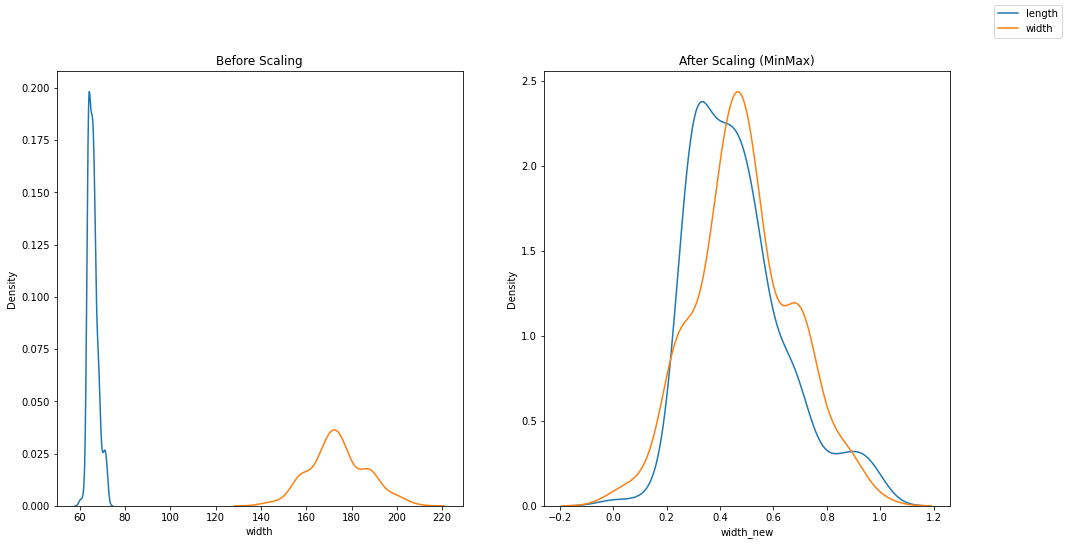

In [47]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize= (16,8))
ax1.set_title('Before Scaling')
sns.kdeplot(scale_data['width'], ax = ax1)
sns.kdeplot(scale_data['length'], ax = ax1)
ax2.set_title('After Scaling (MinMax)')
sns.kdeplot(df_scaler['width_new'], ax = ax2)
sns.kdeplot(df_scaler['length_new'], ax = ax2)
fig.legend(labels = ['length', 'width'])

In [48]:
df[['width_new','length_new']] = df_scaler[['width_new','length_new']]
df.drop(labels=['width', 'length'], axis=1)

make fuel-type aspiration  num-of-doors   body-style drive-wheels  \
0    alfa-romero       gas        std           2.0  convertible          rwd   
1    alfa-romero       gas        std           2.0  convertible          rwd   
2    alfa-romero       gas        std           2.0    hatchback          rwd   
3           audi       gas        std           4.0        sedan          fwd   
4           audi       gas        std           4.0        sedan          4wd   
..           ...       ...        ...           ...          ...          ...   
200        volvo       gas        std           4.0        sedan          rwd   
201        volvo       gas      turbo           4.0        sedan          rwd   
202        volvo       gas        std           4.0        sedan          rwd   
203        volvo    diesel      turbo           4.0        sedan          rwd   
204        volvo       gas      turbo           4.0        sedan          rwd   

    engine-location  wheel-base  height  curb-weight  ... highway-mpg  \
0             front        88.6    48.8         2548  ...          27   
1             front        88.6    48.8         2548  ...          27   
2             front        94.5    52.4         2823  ...          26   
3             front        99.8    54.3         2337  ...          30   
4             front        99.4    54.3         2824  ...          22   
..              ...         ...     ...          ...  ...         ...   
200           front       109.1    55.5         2952  ...          28   
201           front       109.1    55.5         3049  ...          25   
202           front       109.1    55.5         3012  ...          23   
203           front       109.1    55.5         3217  ...          27   
204           front       109.1    55.5         3062  ...          25   

       price  -2 -1  0  1  2  3  width_new  length_new  
0    13495.0   0  0  0  0  0  1   0.316667    0.413433  
1    16500.0   0  0  0  0  0  1   0.316667    0.413433  
2    16500.0   0  0  0  1  0  0   0.433333    0.449254  
3    13950.0   0  0  0  0  1  0   0.491667    0.529851  
4    17450.0   0  0  0  0  1  0   0.508333    0.529851  
..       ...  .. .. .. .. .. ..        ...         ...  
200  16845.0   0  1  0  0  0  0   0.716667    0.711940  
201  19045.0   0  1  0  0  0  0   0.708333    0.711940  
202  21485.0   0  1  0  0  0  0   0.716667    0.711940  
203  22470.0   0  1  0  0  0  0   0.716667    0.711940  
204  22625.0   0  1  0  0  0  0   0.716667    0.711940  

[205 rows x 27 columns]

In [49]:
# Drop rows where nan value a
df = df[df['price'].notna()]

In [50]:
labelEncoder = LabelEncoder()

## Aspiration
Data imbalance between std and turbo is high, so aspiration would be remove from data predict.

In [51]:
df['aspiration'].value_counts()

std      165
turbo     36
Name: aspiration, dtype: int64

In [52]:
dummy_variable = pd.get_dummies(df["aspiration"])
dummy_variable.head()

std  turbo
0    1      0
1    1      0
2    1      0
3    1      0
4    1      0

<AxesSubplot:>

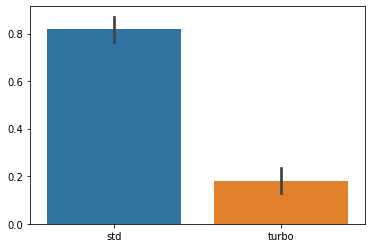

In [53]:
sns.barplot(data = dummy_variable)

## Fuel-type

Data imbalance between diesel and gas is high, so aspiration would be remove from data predict.

In [54]:
df['fuel-type'].value_counts() 

gas       181
diesel     20
Name: fuel-type, dtype: int64

In [55]:
dummy_variable = pd.get_dummies(df["fuel-type"])
dummy_variable.head()

diesel  gas
0       0    1
1       0    1
2       0    1
3       0    1
4       0    1

<AxesSubplot:>

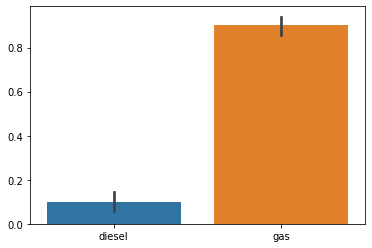

In [56]:
sns.barplot(data = dummy_variable)

## Engine-type

Data is imbalance between attributes, so engine-type would be revmove from predict data

In [57]:
df['engine-type'].value_counts()

ohc      145
ohcf      15
ohcv      13
l         12
dohc      12
rotor      4
Name: engine-type, dtype: int64

In [58]:
dummy_variable = pd.get_dummies(df["engine-type"])
dummy_variable.head()

dohc  l  ohc  ohcf  ohcv  rotor
0     1  0    0     0     0      0
1     1  0    0     0     0      0
2     0  0    0     0     1      0
3     0  0    1     0     0      0
4     0  0    1     0     0      0

<AxesSubplot:>

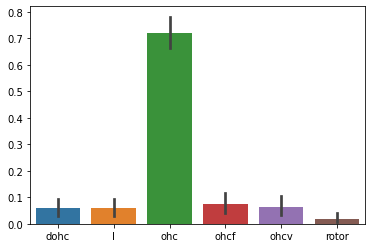

In [59]:
sns.barplot(data = dummy_variable)

## Engine-location

Data imbalance between front and rear is high, so aspiration would be remove from data predict.

In [60]:
df['engine-location'].value_counts() 

front    198
rear       3
Name: engine-location, dtype: int64

In [61]:
dummy_variable = pd.get_dummies(df["engine-location"])
dummy_variable.head()

front  rear
0      1     0
1      1     0
2      1     0
3      1     0
4      1     0

<AxesSubplot:>

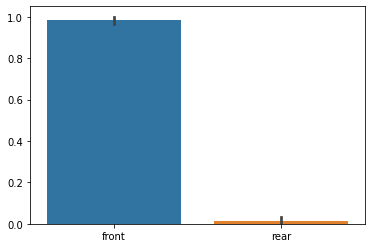

In [62]:
sns.barplot(data = dummy_variable)

## Drive-wheels

Although there is imbalance but oversampling can make it become balance.
Device this attribute into two group: not-fwd(include rwd and 4wd) and fwd

In [63]:
df['drive-wheels'].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

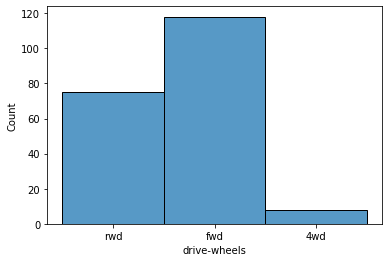

In [64]:
sns.histplot(data = df, x = 'drive-wheels')
plt.show()

In [65]:
df["drive-wheels"].replace(to_replace="4wd", value="not-fwd", inplace=True)
df["drive-wheels"].replace(to_replace="rwd", value="not-fwd", inplace=True)

<AxesSubplot:xlabel='drive-wheels', ylabel='Count'>

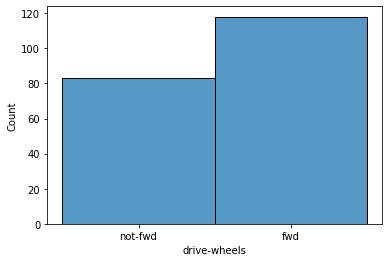

In [66]:
sns.histplot(data = df, x = 'drive-wheels')

In [67]:
dummy_variable = pd.get_dummies(df["drive-wheels"])
dummy_variable.head()

fwd  not-fwd
0    0        1
1    0        1
2    0        1
3    1        0
4    0        1

In [68]:
# Add column fwd and column not-fwd into data.
df = pd.concat([df, dummy_variable], axis=1)

## Fuel-system
Although, values of fuel-system is being imbalance, but oversampling can help this attribute become balance by device fuel-system into two group: mpfi and another (include 2bbl, mfi, 1bbl, 4bbl, idi, spdi)

In [69]:
df['fuel-system'].value_counts()

mpfi    92
2bbl    64
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuel-system, dtype: int64

<AxesSubplot:xlabel='fuel-system', ylabel='Count'>

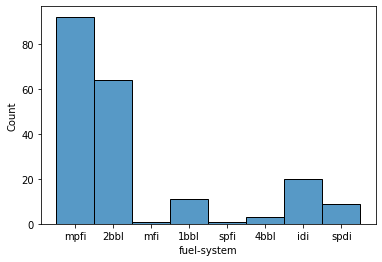

In [70]:
sns.histplot(data = df, x = 'fuel-system')

In [71]:
df["fuel-system"].replace(to_replace="2bbl", value="another-fuel-sys", inplace=True)
df["fuel-system"].replace(to_replace="mfi", value="another-fuel-sys", inplace=True)
df["fuel-system"].replace(to_replace="1bbl", value="another-fuel-sys", inplace=True)
df["fuel-system"].replace(to_replace="spfi", value="another-fuel-sys", inplace=True)
df["fuel-system"].replace(to_replace="4bbl", value="another-fuel-sys", inplace=True)
df["fuel-system"].replace(to_replace="idi", value="another-fuel-sys", inplace=True)
df["fuel-system"].replace(to_replace="spdi", value="another-fuel-sys", inplace=True)

<AxesSubplot:xlabel='fuel-system', ylabel='Count'>

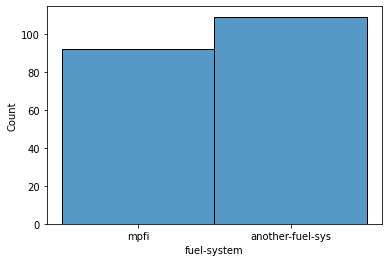

In [72]:
sns.histplot(data = df, x = 'fuel-system')

In [73]:
dummy_variable = pd.get_dummies(df["fuel-system"])
data = pd.concat([df, dummy_variable], axis=1)
dummy_variable.head()

another-fuel-sys  mpfi
0                 0     1
1                 0     1
2                 0     1
3                 0     1
4                 0     1

In [74]:
df = pd.concat([df, dummy_variable], axis=1)

## Make

Because the reputation and quality of the manufacturer also dorminant affect the price of the product. This is an importance attribute for this model. Moreover, distribution of the values of this attribute is balanced relatively. So this attribute can be use for this model.

In [75]:
df['make'].value_counts()

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
subaru           12
volkswagen       12
peugot           11
volvo            11
dodge             9
bmw               8
mercedes-benz     8
plymouth          7
saab              6
audi              6
porsche           4
alfa-romero       3
jaguar            3
chevrolet         3
renault           2
isuzu             2
mercury           1
Name: make, dtype: int64

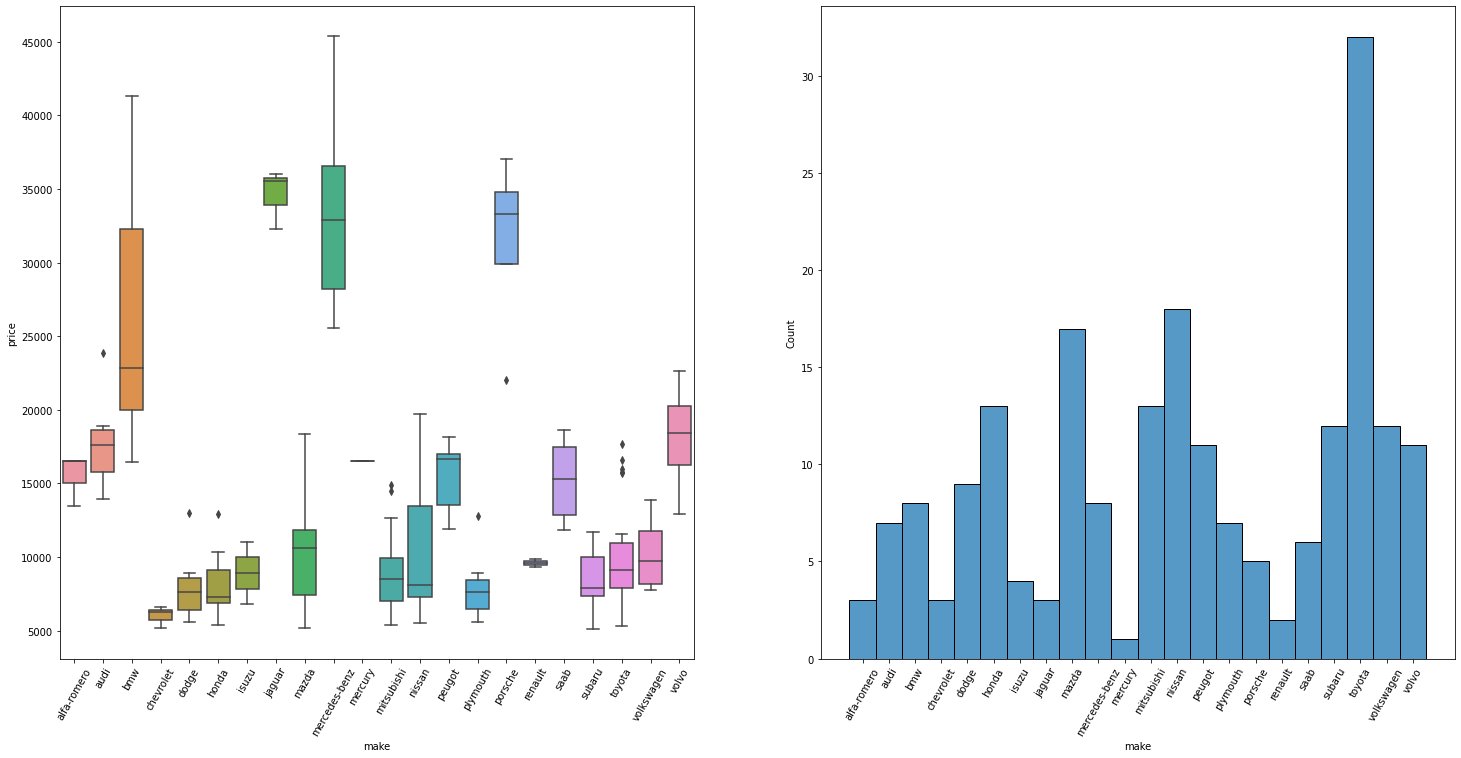

In [76]:
ExploreCateVariable(column='make')

In [77]:
dummy_variable = pd.get_dummies(df["make"])
dummy_variable.head()

alfa-romero  audi  bmw  chevrolet  dodge  honda  isuzu  jaguar  mazda  \
0            1     0    0          0      0      0      0       0      0   
1            1     0    0          0      0      0      0       0      0   
2            1     0    0          0      0      0      0       0      0   
3            0     1    0          0      0      0      0       0      0   
4            0     1    0          0      0      0      0       0      0   

   mercedes-benz  ...  nissan  peugot  plymouth  porsche  renault  saab  \
0              0  ...       0       0         0        0        0     0   
1              0  ...       0       0         0        0        0     0   
2              0  ...       0       0         0        0        0     0   
3              0  ...       0       0         0        0        0     0   
4              0  ...       0       0         0        0        0     0   

   subaru  toyota  volkswagen  volvo  
0       0       0           0      0  
1       0       0           0      0  
2       0       0           0      0  
3       0       0           0      0  
4       0       0           0      0  

[5 rows x 22 columns]

In [78]:
df = pd.concat([df, dummy_variable], axis=1)

## Body-style
Data distribution of body-style is imbalance. In this case can apply downsampling to make data become balance. The values of body-style attribute can be device into two group: sedan and another-style (include hatchback, wagon, hardtop, convertible)

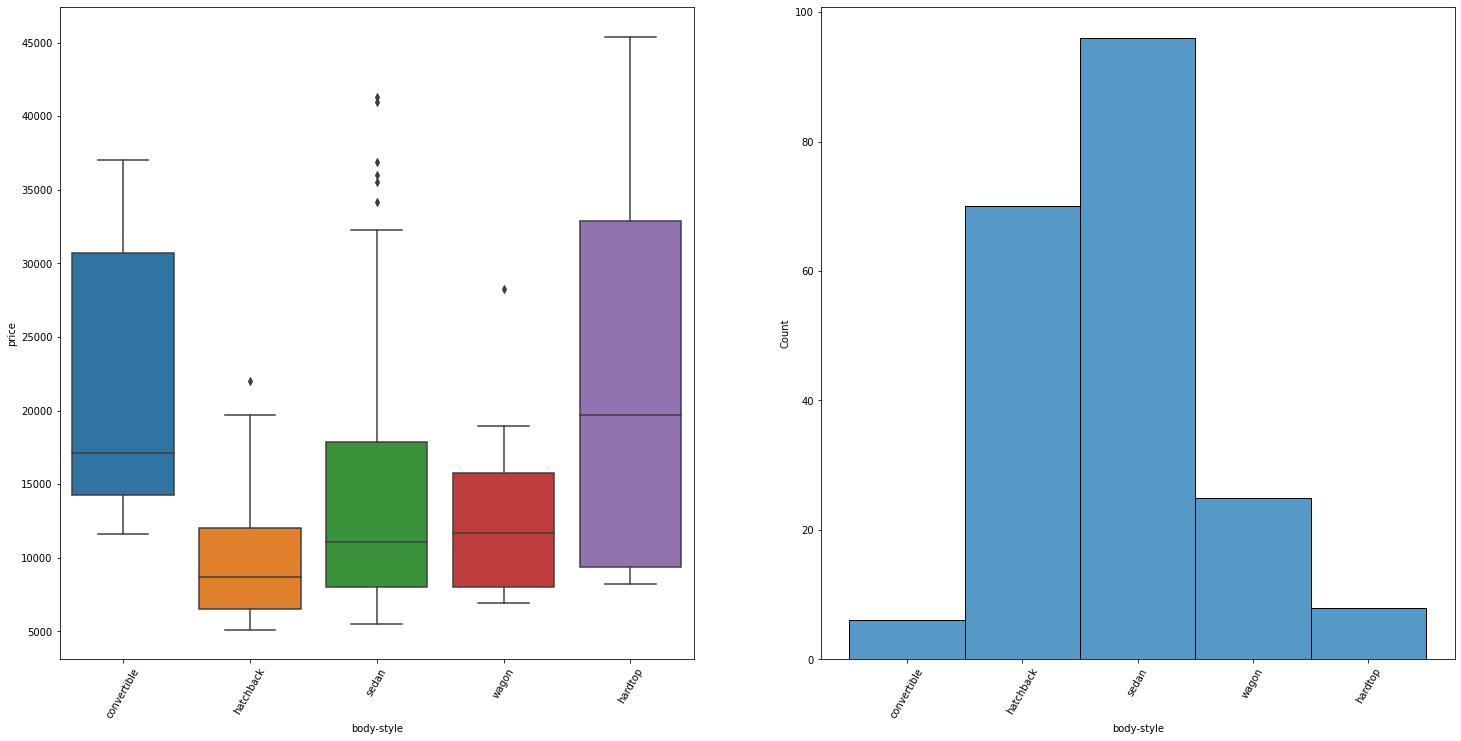

In [79]:
ExploreCateVariable(column='body-style')

In [80]:
df['body-style'].value_counts()

sedan          94
hatchback      68
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64

In [81]:
for c in df['body-style'].value_counts().keys():
    if c != 'sedan':
        df["body-style"].replace(to_replace=c, value="another-style", inplace=True)

In [82]:
df['body-style'].value_counts()

another-style    107
sedan             94
Name: body-style, dtype: int64

In [83]:
dummy_variable = pd.get_dummies(df["body-style"])
dummy_variable.head()

another-style  sedan
0              1      0
1              1      0
2              1      0
3              0      1
4              0      1

In [84]:
# Add column sedan and column another-style into data.
df = pd.concat([df, dummy_variable], axis=1)

## Drop value

In [85]:
df.drop(['fuel-type', 'aspiration', 'drive-wheels', 'engine-location', "engine-type", 'fuel-system', 'body-style', 'make'], axis=1, inplace=True)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 49 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   num-of-doors      201 non-null    float64
 1   wheel-base        201 non-null    float64
 2   length            201 non-null    float64
 3   width             201 non-null    float64
 4   height            201 non-null    float64
 5   curb-weight       201 non-null    int64  
 6   num-of-cylinders  201 non-null    int64  
 7   engine-size       201 non-null    int64  
 8   bore              201 non-null    float64
 9   horsepower        201 non-null    float64
 10  city-mpg          201 non-null    int64  
 11  highway-mpg       201 non-null    int64  
 12  price             201 non-null    float64
 13  -2                201 non-null    uint8  
 14  -1                201 non-null    uint8  
 15  0                 201 non-null    uint8  
 16  1                 201 non-null    uint8  
 1

## Outliners
 
- Số lượng outliers trong dữ liệu chiếm tỉ lệ nhỏ
- Độ chênh lệch của mean khi có và không có outliers cũng nhỏ
=> Không cần thiết phải loại bỏ outliers

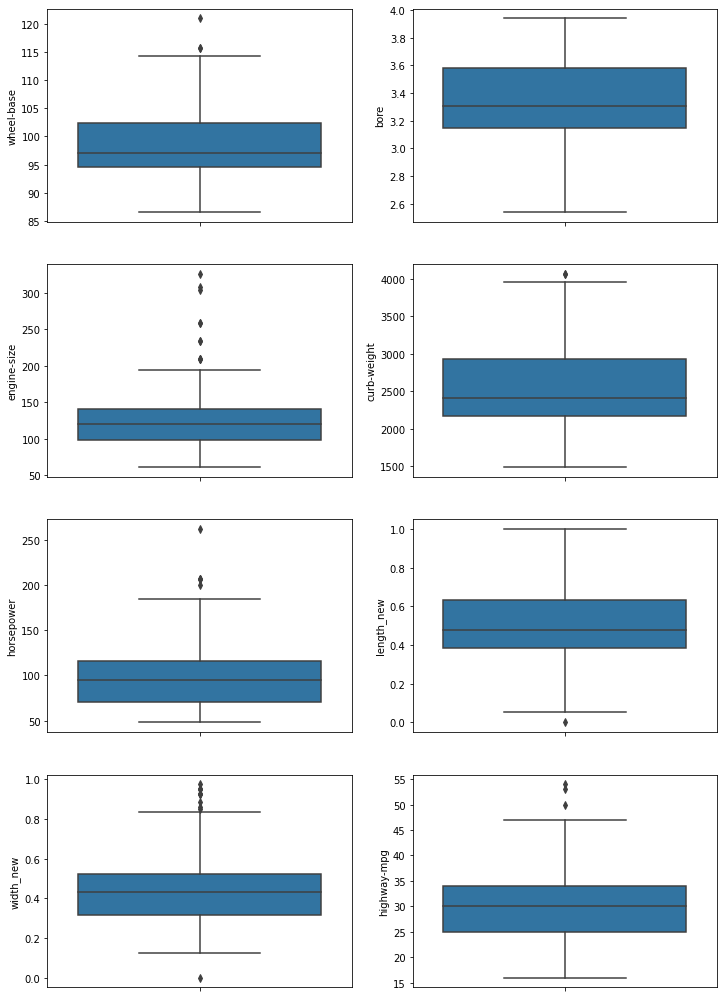

<Figure size 432x288 with 0 Axes>

<Figure size 1296x360 with 0 Axes>

In [87]:
fig, axes = plt.subplots(4, 2, figsize=(12,18))

labels = ['wheel-base','bore', 'engine-size', 'curb-weight',
       'horsepower','length_new', 'width_new', 'highway-mpg', 'city-mpg', 'price']
n = 0
for val in range(4):
    sns.boxplot(data=data, y=labels[n], ax=axes[val, 0])
    sns.boxplot(data=data, y=labels[n+1], ax=axes[val, 1])
    n += 2

plt.show()
plt.clf()

plt.figure(figsize=(18, 5))

plt.show()

In [88]:
def check_outliers(label):
    temp = data[label]
    data_temp = data
    Q1, Q3 = np.percentile(temp, 25), np.percentile(temp, 75)
    IQR = Q3 - Q1
    up, low = round(Q3 + 1.5*IQR, 2), round(Q1 - 1.5*IQR, 2)
    
    percent = (data[data[label] > up].shape[0] + data[data[label] < low].shape[0]) * 100 / temp.shape[0]
    
    data_temp = data_temp[(data_temp[label] <= up) & (data_temp[label] >= low)]
    
    return percent, abs(data_temp[label].mean() - temp.mean()), data_temp[label].mean()/  temp.mean(), abs(data_temp[label].median() - temp.median()), up, low

In [89]:
lst_percent, lst_mean, lst_percent_mean, lst_median, lst_up, lst_low = [], [], [], [], [], []
for i in labels:
    a, b, g, c, d, e = check_outliers(i)
    lst_percent.append(a)
    lst_mean.append(b)
    lst_median.append(c)
    lst_up.append(d)
    lst_low.append(e)
    lst_percent_mean.append(g)

df_outliers = pd.DataFrame(list(zip(lst_percent, lst_mean, lst_percent_mean, lst_median, lst_up, lst_low)), index = labels, 
                           columns =['Ratio of outliers(%)', 'Difference (Mean)', 'Difference (Mean %)', 'Difference (Median)', 'Up', 'Low'])
df_outliers.to_csv('outliers.csv')
df_outliers

Ratio of outliers(%)  Difference (Mean)  Difference (Mean %)  \
wheel-base               1.492537           0.281358             0.997152   
bore                     0.000000           0.000000             1.000000   
engine-size              4.975124           6.702847             0.947170   
curb-weight              0.995025          15.179229             0.994061   
horsepower               2.487562           2.887614             0.972075   
length_new               0.497512           0.002470             1.005000   
width_new                4.975124           0.023739             0.949031   
highway-mpg              1.492537           0.327981             0.989312   
city-mpg                 0.995025           0.229356             0.990891   
price                    6.965174        1703.952883             0.870982   

             Difference (Median)        Up      Low  
wheel-base              0.100000    114.25    82.65  
bore                    0.000000      4.23     2.50  
engine-size            10.000000    205.50    33.50  
curb-weight             0.000000   4061.50  1033.50  
horsepower              0.000000    185.00     1.00  
length_new              0.000000      1.01     0.01  
width_new               0.008333      0.84     0.00  
highway-mpg             0.000000     47.50    11.50  
city-mpg                0.000000     46.50     2.50  
price                 335.000000  29587.50 -5312.50

## Scatter plot


In [90]:
df.columns

Index([    'num-of-doors',       'wheel-base',           'length',
                  'width',           'height',      'curb-weight',
       'num-of-cylinders',      'engine-size',             'bore',
             'horsepower',         'city-mpg',      'highway-mpg',
                  'price',                 -2,                 -1,
                        0,                  1,                  2,
                        3,        'width_new',       'length_new',
                    'fwd',          'not-fwd', 'another-fuel-sys',
                   'mpfi',      'alfa-romero',             'audi',
                    'bmw',        'chevrolet',            'dodge',
                  'honda',            'isuzu',           'jaguar',
                  'mazda',    'mercedes-benz',          'mercury',
             'mitsubishi',           'nissan',           'peugot',
               'plymouth',          'porsche',          'renault',
                   'saab',           'subaru',           'toyo

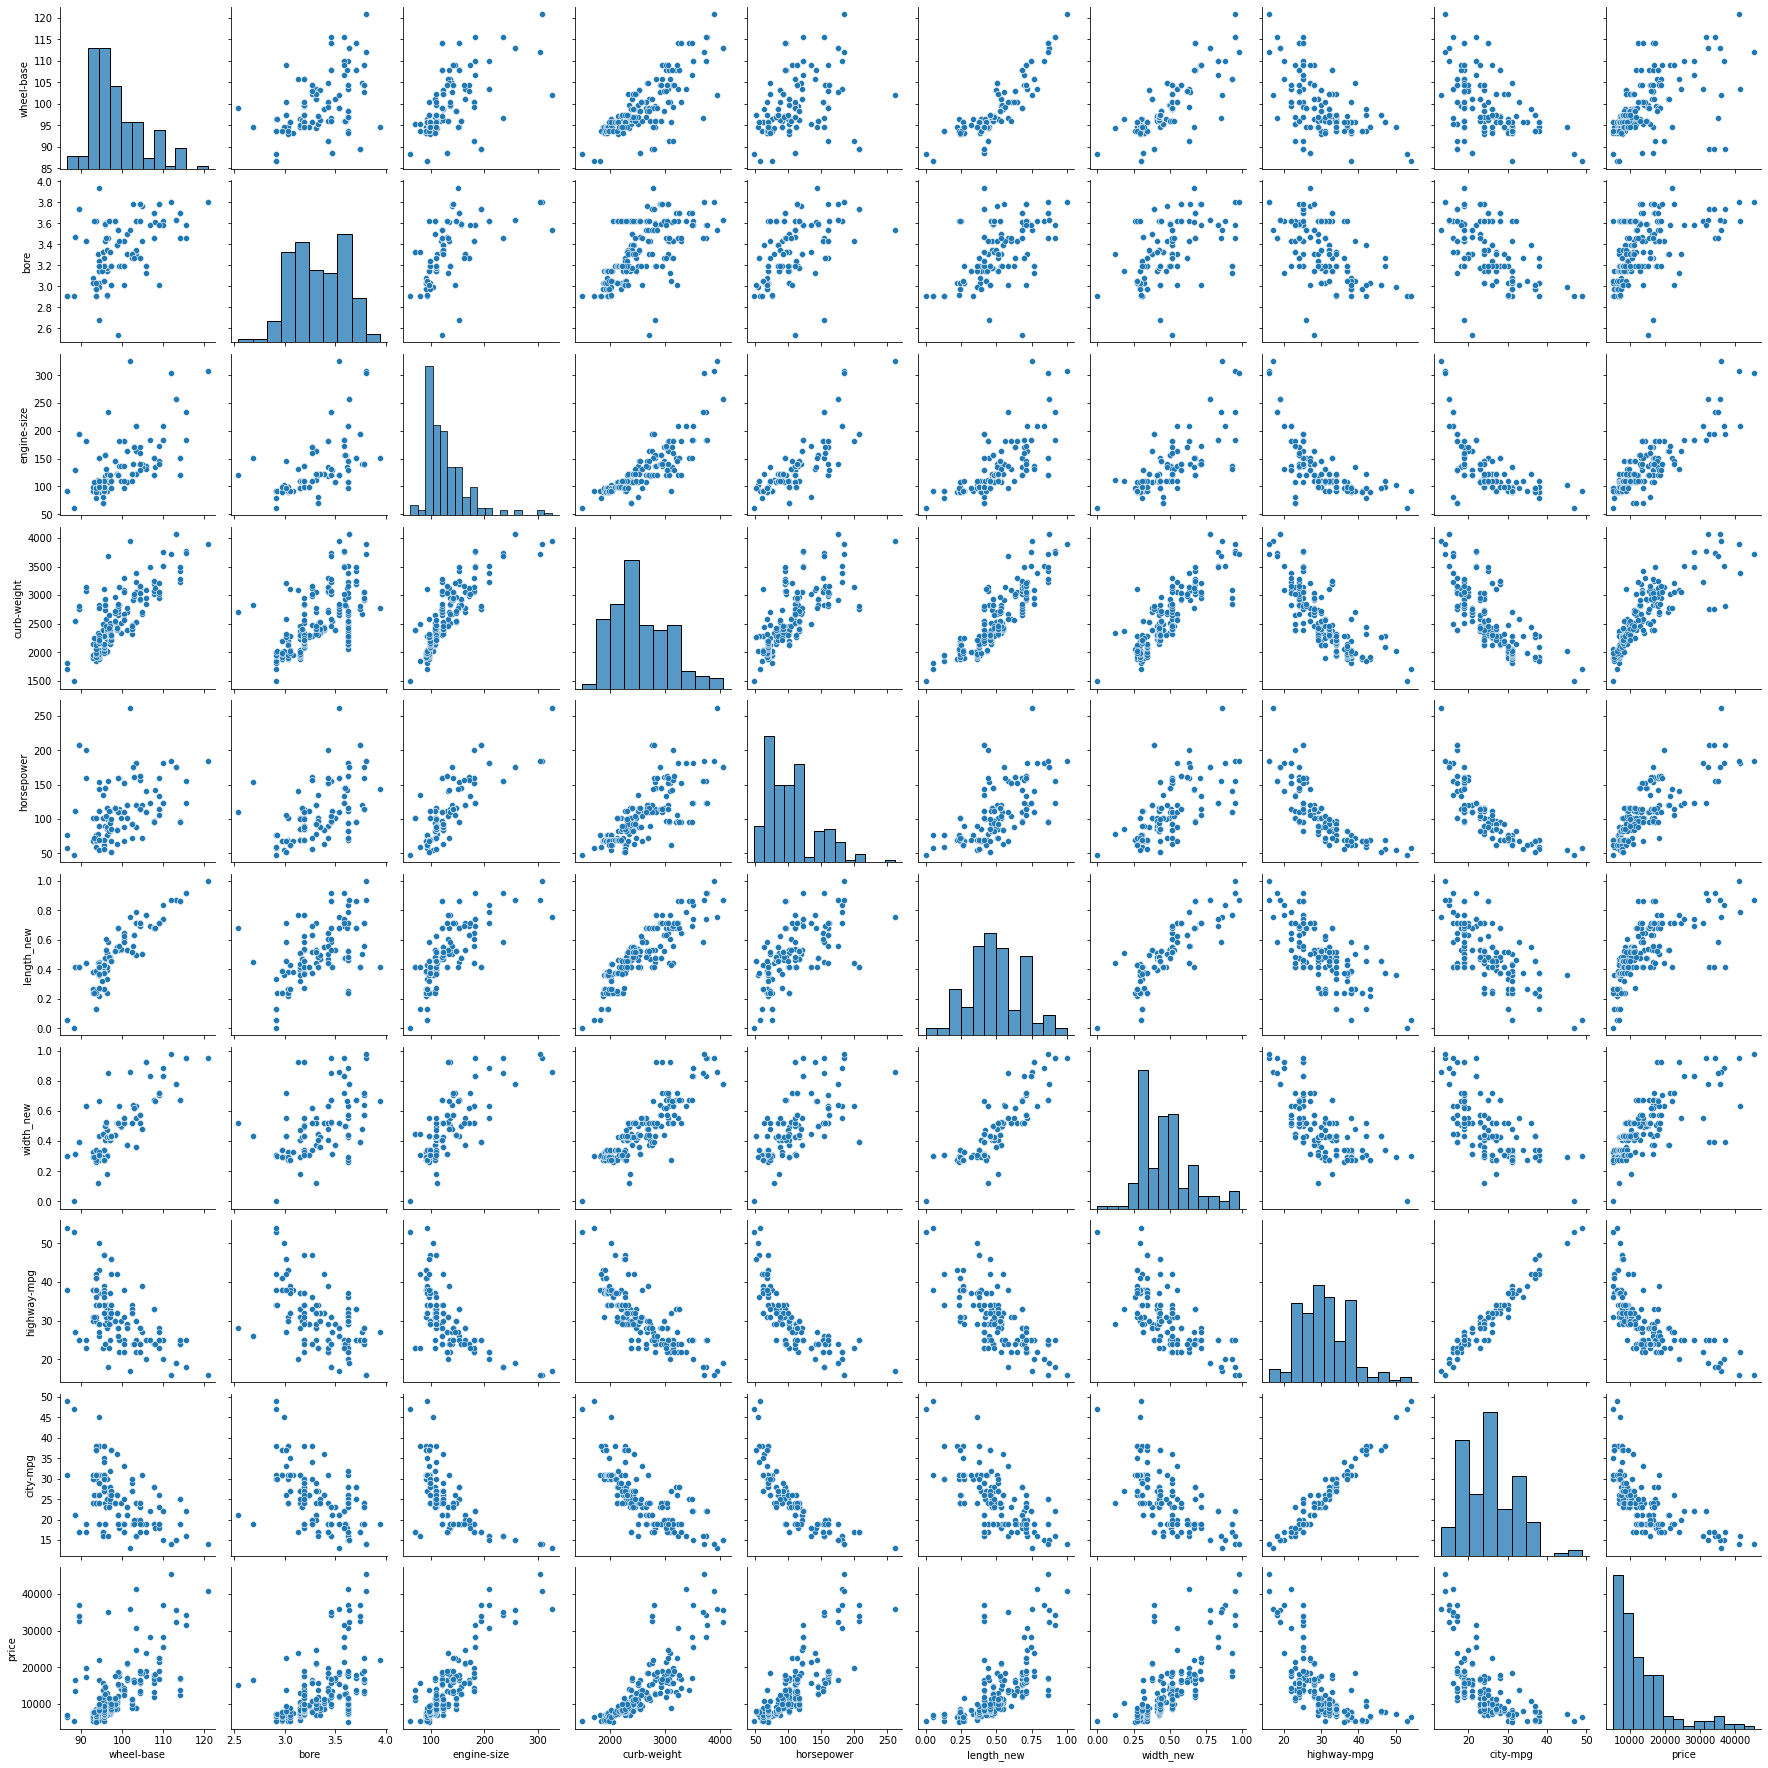

In [91]:
labels = ['wheel-base','bore', 'engine-size', 'curb-weight',
       'horsepower','length_new', 'width_new', 'highway-mpg', 'city-mpg', 'price']
sns.pairplot(df[labels])

# Model Evaluation

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.metrics import precision_recall_fscore_support as score
import datetime

train_cols = ['num-of-doors', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'num-of-cylinders', 'engine-size', 'bore', 'horsepower', 'fwd', 'not-fwd', 'another-fuel-sys', 'mpfi', 'alfa-romero',
       'audi', 'bmw', 'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar',
       'mazda', 'mercedes-benz', 'mercury', 'mitsubishi', 'nissan', 'peugot',
       'plymouth', 'porsche', 'renault', 'saab', 'subaru', 'toyota',
       'volkswagen', 'volvo', 'another-style', 'sedan', 'width_new',
       'length_new','city-mpg', 'highway-mpg']
x_train, x_test, y_train, y_test = train_test_split(df[train_cols], df["price"], test_size=0.2, random_state=41)

In [93]:
x_train.columns

Index(['num-of-doors', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'num-of-cylinders', 'engine-size', 'bore', 'horsepower',
       'fwd', 'not-fwd', 'another-fuel-sys', 'mpfi', 'alfa-romero', 'audi',
       'bmw', 'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'mazda',
       'mercedes-benz', 'mercury', 'mitsubishi', 'nissan', 'peugot',
       'plymouth', 'porsche', 'renault', 'saab', 'subaru', 'toyota',
       'volkswagen', 'volvo', 'another-style', 'sedan', 'width_new',
       'length_new', 'city-mpg', 'highway-mpg'],
      dtype='object')

In [94]:
# Reference code
models = [
    LinearRegression(),
    KNeighborsRegressor(n_neighbors=5),
    DecisionTreeRegressor(),
    RandomForestRegressor(n_estimators=100, max_features = 'auto', bootstrap = True),
    SVR()
]

CV = 10
entries = []
for model in models:
    scores_train = []
    scores_test = []
    abs_scores = []
    mse_train = []
    mse_test = []
    time_scores = []
    
    for j in range(CV):
        t1 = datetime.datetime.now()
        model.fit(x_train, y_train)
        t2 = datetime.datetime.now()
        
        model_name = model.__class__.__name__
        s_train = model.score(x_train, y_train)
        s_test = model.score(x_test, y_test)
        m_train = mean_squared_error(y_train, model.predict(x_train))
        m_test = mean_squared_error(y_test, model.predict(x_test))
        scores_train.append(s_train)
        scores_test.append(s_test)
        abs_scores.append(abs(s_train - s_test))
        mse_train.append(m_train)
        mse_test.append(m_test)
        time_scores.append(round((t2-t1).microseconds/1000,1))
        
    entries.append((model_name, np.array(scores_train).mean(), np.array(scores_test).mean(), np.array(abs_scores).mean(), np.array(mse_train).mean(), np.array(mse_test).mean(), np.array(time_scores).mean()))

cv_df = pd.DataFrame(entries, columns = ['model_name','score_train_mean','score_test_mean','abs_mean','mse_train','mse_test','time_mean'])

In [95]:
cv_df.to_csv('evaluate.csv')
cv_df

model_name  score_train_mean  score_test_mean  abs_mean  \
0       LinearRegression          0.944859         0.896463  0.048396   
1    KNeighborsRegressor          0.859655         0.771261  0.088394   
2  DecisionTreeRegressor          0.998488         0.863590  0.134897   
3  RandomForestRegressor          0.989480         0.918069  0.071411   
4                    SVR         -0.106118        -0.088306  0.017811   

      mse_train      mse_test  time_mean  
0  3.537772e+06  5.964118e+06       2.70  
1  9.004373e+06  1.317625e+07       1.30  
2  9.702629e+04  7.857727e+06       2.94  
3  6.749337e+05  4.719515e+06     148.00  
4  7.096712e+07  6.269063e+07       3.10

In [96]:
model = RandomForestRegressor(n_estimators=100, max_features = 'auto', bootstrap = True)

In [97]:
 model.fit(x_train, y_train)

RandomForestRegressor()

In [98]:
y_pre_train = model.predict(x_train)
result_train = pd.DataFrame(data=y_pre_train, columns=['predicted'])
result_train = pd.concat([result_train, pd.DataFrame(data=list(y_train), columns=['actual'])], axis=1)
result_train

predicted   actual
0     9374.100000   9980.0
1    14206.590000  12440.0
2     8253.393333   8189.0
3     7174.170000   6938.0
4     6387.499167   6229.0
..            ...      ...
155  27158.720000  28248.0
156  14496.400000  14869.0
157   9747.253333   9233.0
158   9075.170000   8449.0
159  16009.870000  15985.0

[160 rows x 2 columns]

<AxesSubplot:>

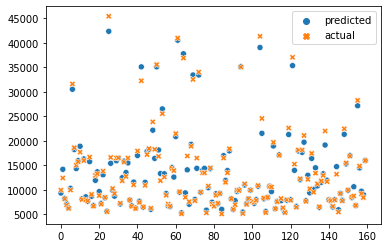

In [99]:
sns.scatterplot(data=result_train)

In [100]:
y_pre_test = model.predict(x_test)
result_test = pd.DataFrame(data=y_pre_test, columns=['predicted'])
result_test = pd.concat([result_test, pd.DataFrame(data=list(y_test), columns=['actual'])], axis=1)
result_test

predicted   actual
0    9506.790000   8949.0
1   13372.940000  18344.0
2   10474.425000   8948.0
3   20984.560000  19045.0
4   35418.200000  34184.0
5   14113.930000  16430.0
6    7670.210000   7198.0
7    6876.100000   7299.0
8    6605.460000   7395.0
9   11802.080000  11199.0
10   6073.940000   6855.0
11   8022.348000   7609.0
12   5492.620000   6479.0
13  38090.220000  30760.0
14   7915.300000   6918.0
15  15788.140000  12940.0
16   7866.480000   7349.0
17  17486.440000  18950.0
18   9526.918333   8845.0
19   8011.290000   7898.0
20   9266.210000  11595.0
21  18738.178333  20970.0
22   6102.080000   6795.0
23   9345.423333   9495.0
24  10863.038333   9988.0
25  12806.210000  17669.0
26  11509.456667   9295.0
27  15529.000000  15580.0
28   9477.806667  11245.0
29   9829.483333  10198.0
30  29275.140000  28176.0
31   5772.890000   5572.0
32   8071.865000   7957.0
33  11551.160000  13645.0
34   9430.180000   9298.0
35  37632.010000  36000.0
36   6721.348333   6338.0
37   9332.720000   6785.0
38   9142.450000  10345.0
39  17167.530000  13860.0
40  12220.030000  15645.0

<AxesSubplot:>

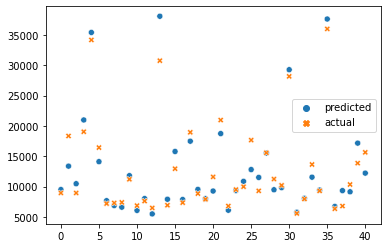

In [101]:
sns.scatterplot(data=result_test)

In [102]:
train_cols = ['num-of-doors', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'num-of-cylinders', 'engine-size', 'bore', 'horsepower', 'fwd', 'not-fwd', 'another-fuel-sys', 'mpfi', 'alfa-romero',
       'audi', 'bmw', 'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar',
       'mazda', 'mercedes-benz', 'mercury', 'mitsubishi', 'nissan', 'peugot',
       'plymouth', 'porsche', 'renault', 'saab', 'subaru', 'toyota',
       'volkswagen', 'volvo', 'another-style', 'sedan', 'width_new',
       'length_new','city-mpg', 'highway-mpg', -2, -1, 0, 1, 2, 3]
x_train, x_test, y_train, y_test = train_test_split(df[train_cols], df["price"], test_size=0.2, random_state=41)

In [103]:
# Reference code
# Re-train model with new train_cols
models = [
    LinearRegression(),
    KNeighborsRegressor(n_neighbors=5),
    DecisionTreeRegressor(),
    RandomForestRegressor(n_estimators=100, max_features = 'auto', bootstrap = True),
    SVR()
]

CV = 10
entries = []
for model in models:
    scores_train = []
    scores_test = []
    abs_scores = []
    mse_train = []
    mse_test = []
    time_scores = []
    
    for j in range(CV):
        t1 = datetime.datetime.now()
        model.fit(x_train, y_train)
        t2 = datetime.datetime.now()
        
        model_name = model.__class__.__name__
        s_train = model.score(x_train, y_train)
        s_test = model.score(x_test, y_test)
        m_train = mean_squared_error(y_train, model.predict(x_train))
        m_test = mean_squared_error(y_test, model.predict(x_test))
        scores_train.append(s_train)
        scores_test.append(s_test)
        abs_scores.append(abs(s_train - s_test))
        mse_train.append(m_train)
        mse_test.append(m_test)
        time_scores.append(round((t2-t1).microseconds/1000,1))
        
    entries.append((model_name, np.array(scores_train).mean(), np.array(scores_test).mean(), np.array(abs_scores).mean(), np.array(mse_train).mean(), np.array(mse_test).mean(), np.array(time_scores).mean()))

cv_df = pd.DataFrame(entries, columns = ['model_name','score_train_mean','score_test_mean','abs_mean','mse_train','mse_test','time_mean'])

In [104]:
cv_df.to_csv('evaluate_2.csv')
cv_df

model_name  score_train_mean  score_test_mean  abs_mean  \
0       LinearRegression          0.946848         0.896724  0.050124   
1    KNeighborsRegressor          0.859655         0.771261  0.088394   
2  DecisionTreeRegressor          0.998488         0.827685  0.170803   
3  RandomForestRegressor          0.989279         0.918096  0.071184   
4                    SVR         -0.106125        -0.088314  0.017811   

      mse_train      mse_test  time_mean  
0  3.410138e+06  5.949088e+06       2.20  
1  9.004373e+06  1.317625e+07       2.00  
2  9.702629e+04  9.926033e+06       3.09  
3  6.878252e+05  4.718006e+06     156.54  
4  7.096759e+07  6.269109e+07       3.00

In [105]:
model = RandomForestRegressor(n_estimators=100, max_features = 'auto', bootstrap = True)
model.fit(x_train, y_train)

RandomForestRegressor()

In [106]:
y_pre_train = model.predict(x_train)
result_train = pd.DataFrame(data=y_pre_train, columns=['predicted'])
result_train = pd.concat([result_train, pd.DataFrame(data=list(y_train), columns=['actual'])], axis=1)
result_train

predicted   actual
0     9614.600000   9980.0
1    13695.630000  12440.0
2     8365.758333   8189.0
3     7306.440000   6938.0
4     6340.757167   6229.0
..            ...      ...
155  27896.470000  28248.0
156  14499.400000  14869.0
157  10349.250000   9233.0
158   8992.080000   8449.0
159  15945.980000  15985.0

[160 rows x 2 columns]

<AxesSubplot:>

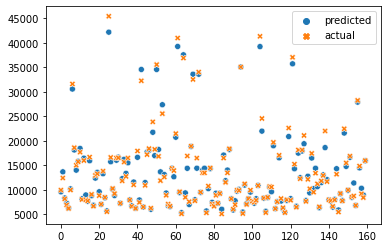

In [107]:
sns.scatterplot(data=result_train)

In [108]:
y_pre_test = model.predict(x_test)
result_test = pd.DataFrame(data=y_pre_test, columns=['predicted'])
result_test = pd.concat([result_test, pd.DataFrame(data=list(y_test), columns=['actual'])], axis=1)
result_test

predicted   actual
0    9485.680000   8949.0
1   13816.190000  18344.0
2   10628.440000   8948.0
3   20850.540000  19045.0
4   34568.220000  34184.0
5   14311.415000  16430.0
6    7766.990000   7198.0
7    6822.800000   7299.0
8    6647.020000   7395.0
9   11760.920000  11199.0
10   6056.240000   6855.0
11   7992.605000   7609.0
12   5503.800000   6479.0
13  38800.440000  30760.0
14   7867.670000   6918.0
15  15432.510000  12940.0
16   7806.240000   7349.0
17  17266.610000  18950.0
18   9807.406667   8845.0
19   7965.530000   7898.0
20   9494.020000  11595.0
21  18657.070000  20970.0
22   6012.670000   6795.0
23   9217.086667   9495.0
24  10930.283333   9988.0
25  13059.380000  17669.0
26  11775.340000   9295.0
27  15747.270000  15580.0
28   9384.993333  11245.0
29   9768.876667  10198.0
30  30331.750000  28176.0
31   5822.370000   5572.0
32   8124.852000   7957.0
33  11458.388810  13645.0
34   9429.800000   9298.0
35  37768.340000  36000.0
36   6746.905333   6338.0
37   9432.940000   6785.0
38   9109.816667  10345.0
39  16547.940000  13860.0
40  11909.685000  15645.0

<AxesSubplot:>

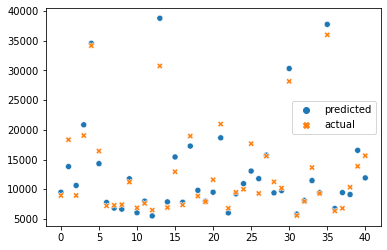

In [109]:
sns.scatterplot(data=result_test)